# Introduction
# Book: The Resonant Tunneling Diode photonics: Devices and applications 2nd Edition

##Refractive index of $Al_xGa_{1-x}As$ and Waveguide modes
##Charlie Ironside, Bruno Romeiria and Jose Figueiredo

First edition at http://dx.doi.org/10.1088/2053-2571/ab3a9a

Notebook by :-
Prof. Charlie Ironside

Department of Physics and Astronomy

Curtin University 

Bentley Campus,

Western Australia 6102

* email: Charlie.Ironside@curtin.edu.au

* web page address:http://oasisapps.curtin.edu.au/staff/profile/view/Charlie.Ironside

Prof. Charlie Ironside,
Department of Physics and Astronomy,
Curtin University,
Bentley Campus,
Western Australia 6102.

* email: Charlie.Ironside@curtin.edu.au

* web page address:http://oasisapps.curtin.edu.au/staff/profile/view/Charlie.Ironside




# The refractive index of $Al_xGa_{1-x}As$ 

The programme parameter from the folllowing sources to calculate the dispersion of the refractive index of $Al_xGa_{1-x}As$ for different values of x

S. Adachi, "GaAs, AlAs, $Al_xGa_{1-x}As$  material parameters for use in research and device applications," Journal of Applied Physics, vol. 58, no. 3, pp. R1-R29, 1985, http://dx.doi.org/10.1063/1.336070

https://www.batop.de/information/n_AlGaAs.html#


# Load Packages

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy import constants
import ipywidgets as widgets
import math

# Calculate the dispersion of the 𝐴𝑙𝑥𝐺𝑎1−𝑥𝐴𝑠 refactive index 

In [2]:

#Refractive Index Dispersion AlGaAs
def AlGaAs_n(wavelength,Al_x,): #input wavelength in nm and Al fraction
    c=constants.speed_of_light#fundamental constants
    h=constants.Planck#fundamental constants
    e=constants.elementary_charge#fundamental constants
    A0=6.3+19.0*Al_x #see the above references for this value
    B0=9.4-10.2*Al_x #see the above references for this value
    E_O=1.425+1.155*Al_x+0.37*Al_x**2 #see the above references for this value
    E_SO=1.765+1.115*Al_x+0.37*Al_x**2 #see the above references for this value
    X_x=(h*c)/(e*wavelength*1E-9*E_O) #see the above references for this value
    X_SO=(h*c)/(e*wavelength*1E-9*E_SO) #see the above references for this value
    f1=(2-math.sqrt(1+X_x)-math.sqrt(1-X_x))/(X_x**2) #see the above references for this value
    f2=(2-math.sqrt(1+X_SO)-math.sqrt(1-X_SO))/(X_SO**2)#see the above references for this value
    n=math.sqrt((A0*(f1+f2/2*(E_O/E_SO)**(3/2))+B0))#see the above references for this values https://www.batop.de/information/n_AlGaAs.html#
    return n
def n_spect(wave_start,wave_range,Al_x):
    wave_finish=wave_start+wave_range
    n_total=256 #number of points to plot
    wave_range=np.linspace(wave_start,wave_finish,n_total)
    n_wavelength=np.zeros(n_total)
    for i in range(n_total):
        n_wavelength[i]=AlGaAs_n(wave_range[i],Al_x)

    #Set up labels for graph
    Al_fraction="Al fraction= "+str(Al_x)
    Al_position=np.max(n_wavelength)

    #Plotting the refractive index versus wavelength
    fig,ax=plt.subplots(1,1,figsize=(10, 5))
    ax.set_title('$Al_xGa_{1-x}As$ refractive index versus wavelength',fontsize=20)
    ax.plot(wave_range,n_wavelength,color='k',linewidth=3.0)
    ax.set_ylabel('Refractive index',fontsize=20)
    ax.set_xlabel('Wavelength [nm]',fontsize=20)
    ax.text((wave_finish-0.2*(wave_finish-wave_start)),Al_position, Al_fraction,fontsize=14)
    ax.grid()
    plt.show()
#n_spect(1200,1600,0.4)
wave_start=widgets.FloatSlider(min=890,max=1600,value=1000,step=5, description="Start[nm]")
wave_range=widgets.FloatSlider(min=50,max=2000,value=1000,step=5, description="Range[nm]")
Al_x=widgets.FloatSlider(min=0,max=1.0,value=0,step=0.01, description="Al fraction")
widgets.interactive(n_spect,wave_start=wave_start,wave_range=wave_range,Al_x=Al_x)


interactive(children=(FloatSlider(value=1000.0, description='Start[nm]', max=1600.0, min=890.0, step=5.0), Flo…

# Design of $Al_xGa_{1-x}As$ optical waveguides

From the dimensions and x content of $Al_xGa_{1-x}As$ epitaxial layers this section demonstrates how the website ,M. Hammer. "Simulations in Integrated optics." https://www.computational-photonics.eu/ (accessed 2023) can be used to calculate the allowed optical modes - this helps with the design of an optical waveguide containing a RTD.

Also see these links:-

https://www.computational-photonics.eu/eims.html

https://www.computational-photonics.eu/eimsinout.html


In [3]:

URL1 ='https://www.dropbox.com/s/dchsagpxsik0611/te0-0Eymod.xyz?raw=1' #this is the data from https://www.computational-photonics.eu/eims.html
mode=pd.read_csv(URL1,sep=" ",header=None)#takes the xyz file format and converts into Pandas dataframe
#print(mode)
mode.columns=["y","Invalid1","x","Invalid2","Intensity"]
mode=mode.drop(columns=['Invalid1', 'Invalid2'])

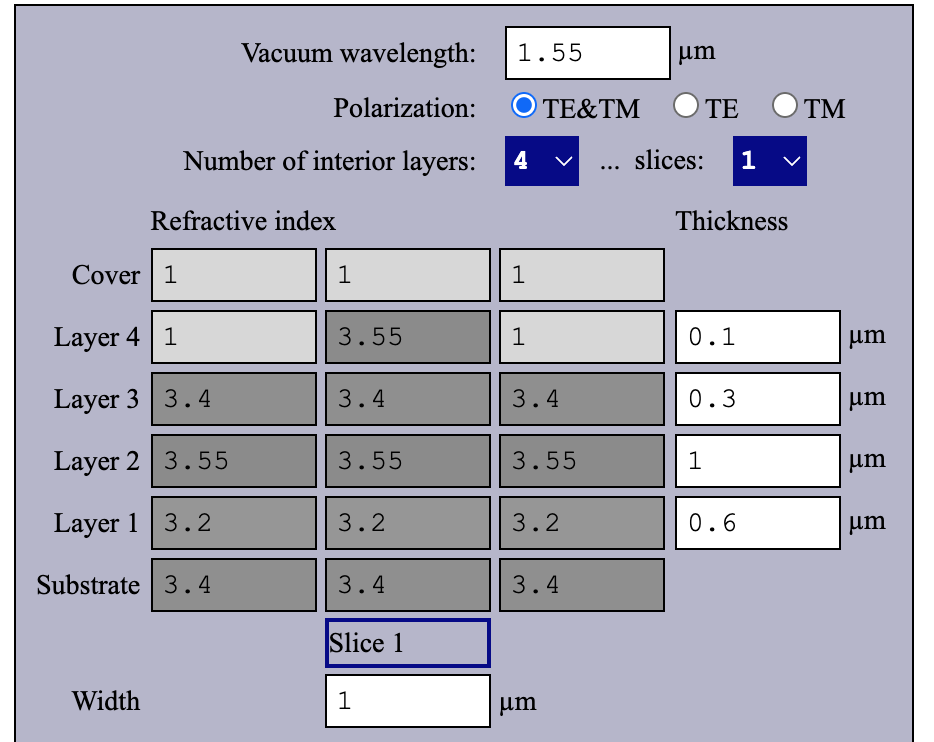

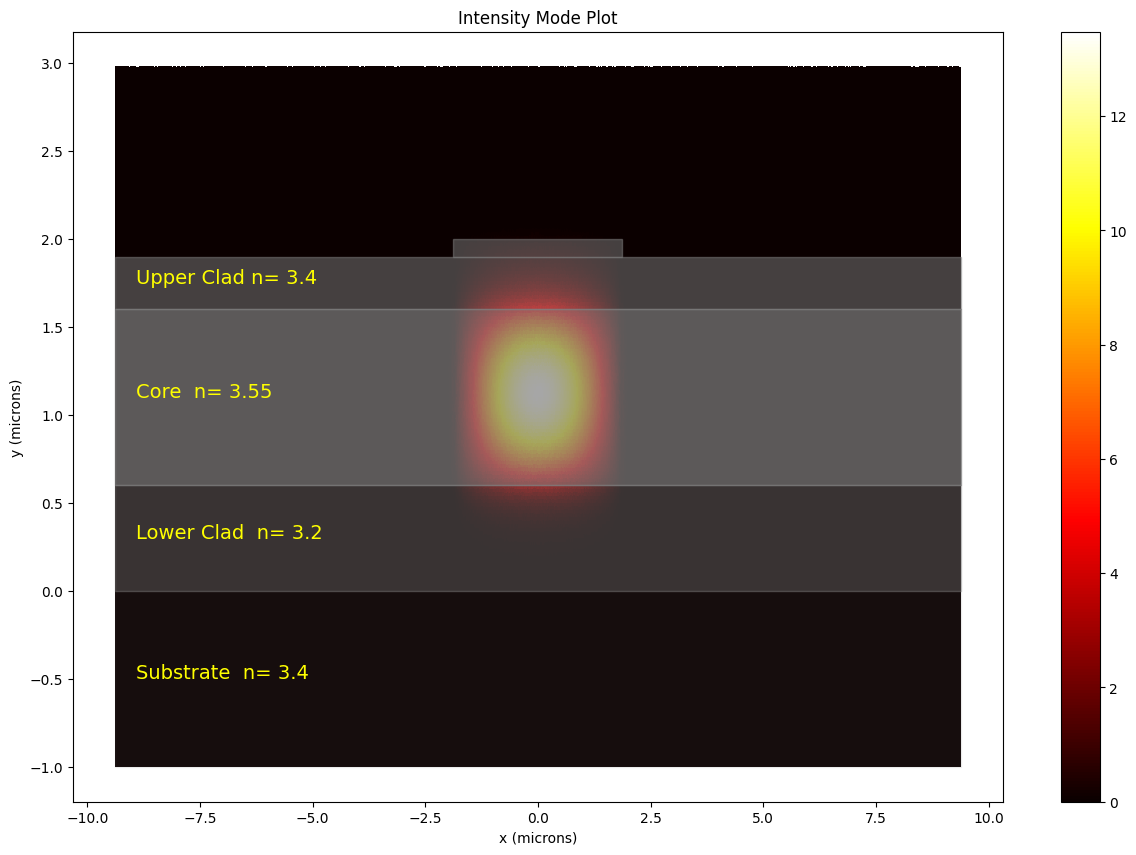

In [4]:
#mode_x=np.zeros(len(mode['x']))
##mode_y=np.zeros(len(mode['y']))
#mode_intense=np.zeros(len(mode['y']))
#Wavelength is 1.55 microns
mode_y=mode['y']
mode_x=mode['x']
mode_intense=mode['Intensity']
#substrate
sub_n=3.4 #refractive index
substrate_x=mode_x[0]
substrate_y=mode_y[0]
sub_scale=0.1
sub_x=mode_x[len(mode_x)-1]-mode_x[0]
sub_y=abs(mode_y[0])

#first layer lower cladding
layer1_n=3.2 #refractive index
layer1_thick=.6
layer1_x=mode_x[0]
layer1_y=0
layer1_scale=0.4
layer1_xlen=mode_x[len(mode_x)-1]-mode_x[0]
layer1_ylen=layer1_thick

#second layer core
layer2_n=3.55 
layer2_thick=1.0
layer2_x=mode_x[0]
layer2_y=layer1_thick
layer2_scale=0.7
layer2_xlen=mode_x[len(mode_x)-1]-mode_x[0]
layer2_ylen=layer2_thick

#third layer upper cladding
layer3_n=3.4 
layer3_thick=0.3
layer3_x=mode_x[0]
layer3_y=layer1_thick+layer2_thick
layer3_scale=0.5
layer3_xlen=mode_x[len(mode_x)-1]-mode_x[0]
layer3_ylen=layer3_thick

#fourth layer channel
layer4_n=3.55 
layer4_thick=0.1
layer4_wide=3.75
layer4_x=-layer4_wide/2
layer4_y=layer1_thick+layer2_thick+layer3_thick
layer4_scale=layer3_scale
layer4_xlen=layer4_wide
layer4_ylen=layer4_thick

#annotate the layers
index="n= "
sub_text="Substrate  "+index+str(sub_n)
sub_textx=mode_x[0]- mode_x[0]*0.05
sub_texty=-sub_y/2
layer1_text="Lower Clad  "+index+str(layer1_n)
layer1_textx=sub_textx
layer1_texty=layer1_thick/2
layer2_text="Core  "+index+str(layer2_n)
layer2_textx=sub_textx
layer2_texty=layer1_thick+layer2_thick/2
layer3_text="Upper Clad "+index+str(layer3_n)
layer3_textx=sub_textx
layer3_texty=layer1_thick+layer2_thick+layer3_thick/2


#plot the mode 
fig,ax=plt.subplots(1,1,figsize=(15, 10))
ax.set_title('Intensity Mode Plot')

#plt.tricontour(mode_x,mode_y,mode_intense,colors='green')
plt.tripcolor(mode_x,mode_y,mode_intense,cmap='hot')

#Draw the layers
ax.add_patch(Rectangle((substrate_x, substrate_y),sub_x, sub_y,color='grey',alpha=sub_scale))
ax.add_patch(Rectangle((layer1_x, layer1_y),layer1_xlen, layer1_ylen,color='grey',alpha=layer1_scale))
ax.add_patch(Rectangle((layer2_x, layer2_y),layer2_xlen, layer2_ylen,color='grey',alpha=layer2_scale))
ax.add_patch(Rectangle((layer3_x, layer3_y),layer3_xlen, layer3_ylen,color='grey',alpha=layer3_scale))
ax.add_patch(Rectangle((layer4_x, layer4_y),layer4_xlen, layer4_ylen,color='grey',alpha=layer4_scale))
ax.text(sub_textx,sub_texty,sub_text, fontsize=14,color='yellow')
ax.text(layer1_textx,layer1_texty,layer1_text, fontsize=14,color='yellow')
ax.text(layer2_textx,layer2_texty,layer2_text, fontsize=14,color='yellow')
ax.text(layer3_textx,layer3_texty,layer3_text, fontsize=14,color='yellow')



ax.set_ylabel('y (microns)')
ax.set_xlabel('x (microns)')
plt.colorbar()
plt.show()